In [8]:
# from cmath import nan
# from scratchpad.polymer_am_eaton.scratch.plot_eaton_graphs import number_density_z
from tomo2mesh.structures.voids import VoidLayers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import sys
import os

# from tomo2mesh.projects.eaton.rw_utils_ae import read_raw_data_1X, save_path
# from tomo2mesh.projects.eaton.void_mapping import void_map_gpu, void_map_all
# from tomo2mesh.projects.eaton.params import pixel_size_1X as pixel_size
# from tomo2mesh.projects.eaton.recon import recon_binned, recon_all
# from tomo2mesh.structures.patches import Patches
# from tomo2mesh.structures.voids import Voids

# from operator import mod
# from tomo2mesh.misc.voxel_processing import TimerGPU, edge_map, modified_autocontrast, get_values_cyl_mask, cylindrical_mask, TimerCPU
# from tomo2mesh.projects.eaton.recon import recon_binned
# import cupy as cp

# from skimage.filters import threshold_otsu
# from cupyx.scipy import ndimage
# from scipy import ndimage as ndimage_cpu
# import cc3d

# plots_dir = '/home/yash/eaton_plots2/'
# if not os.path.exists(plots_dir):
#     os.makedirs(plots_dir)
#import matplotlib as mpl
# mpl.use('Agg')


In [2]:
sample_tag = '1'
scan_tag = '125'
b=1
z_crop = (0,1536)
fpath = f'/data01/Eaton_Polymer_AM/voids_data/sample{sample_tag}_scan{scan_tag}_fact{b}'
radius = 50


In [3]:
# projs, theta, center, dark, flat = read_raw_data_1X(sample_tag, scan_tag)


In [4]:
# timer = TimerCPU("secs")

# # tmp_path = '/data01/Eaton_Polymer_AM/reconstructed/tmp_rec'
# #Reconstruction
# t_gpu = TimerGPU("secs")
# memory_pool = cp.cuda.MemoryPool()
# cp.cuda.set_allocator(memory_pool.malloc)

# ntheta, nz, n = projs.shape
# projs = np.mean(projs.reshape(ntheta,nz//b,b,n//b,b), axis = (2,4))
# projs = np.array(projs, dtype = np.float32)
# dark = np.mean(dark.reshape(nz//b, b, n//b, b), axis = (1,3))
# flat = np.mean(flat.reshape(nz//b, b, n//b, b), axis = (1,3))
# dark = np.array(dark.astype(np.float32), dtype = np.float32)
# flat = np.array(flat.astype(np.float32), dtype = np.float32)
# theta = np.array(theta, dtype = np.float32)
# center = np.float32(center/float(b))

# #FBP
# t_gpu.tic()
# V = recon_all(projs, theta, center, 32, dark, flat, pixel_size) 
# V_rec = V #[:(nz//28)*28,:(n//28)*28,:(n//28)*28] 

# t_rec = t_gpu.toc('RECONSTRUCTION')

# timer = TimerCPU("secs")
# timer.tic()
# p_size = 144
# patches = Patches(V_rec.shape, initialize_by = "bestfit_grid", patch_size = (p_size,p_size,p_size))
# x_vols = patches.extract(V_rec, (p_size,p_size,p_size))
# timer.toc("Create patches")

# timer.tic()
# thresh_list = []
# for i in range(len(x_vols)):
#     thresh_list.append((x_vols[i]<threshold_otsu(x_vols[i][::3,::3,::3])).astype(np.uint8))
# timer.toc("Create thresh list")

# timer = TimerCPU("secs")
# timer.tic()
# V_seg = np.empty(V_rec.shape, dtype = np.uint8)
# patches.fill_patches_in_volume(thresh_list, V_seg)
# V_seg = V_seg[slice(z_crop[0]//b, z_crop[1]//b),...]
# timer.toc("Fill patches")

# # Connected components
# if b==1:
#     cylindrical_mask(V_seg, 1, mask_val = 0)
#     V_seg = cc3d.connected_components(V_seg)

#     # Porosity without dust removal
#     porosity = (np.sum((V_seg>0).astype(np.uint8)))/(np.prod(V_seg.shape)*np.pi/4)
#     print("Porosity before dust removal:", porosity)

#     timer.tic()
#     voids_b = Voids().count_voids(V_seg, b, 0)

#     # Porosity calculation with dust removal
#     # try 1
#     porosity = np.sum(voids_b["sizes"])/(np.prod(voids_b.vol_shape)*np.pi/4)
#     print("Porosity after dust removal: ", porosity)
#     voids_b["porosity"] = porosity


In [5]:
# del V
# del V_rec
# del V_seg
# memory_pool.free_all_blocks() 

In [6]:
# voids_b.write_to_disk(f'/data01/Eaton_Polymer_AM/voids_data/sample{sample_tag}_scan{scan_tag}_fact{b}')


In [9]:
voids_all = VoidLayers().import_from_disk(fpath)


In [83]:
dust_thresh = [0,2,5,8,11,14,17,20,23] #,26,29,32,35,38,41,44,47]
porosity = []
for i in range(len(dust_thresh)):
    count = 0
    for j in range(len(voids_all['x_voids'])):
        if np.all(np.clip(voids_all['x_voids'][j].shape-np.array((dust_thresh[i],dust_thresh[i],dust_thresh[i])), 0, None)):
            count+=voids_all['sizes'][j]
    porosity.append(np.sum(count)/(2448*2448*1536*np.pi/4))
    
dust_thresh = (np.array(dust_thresh)+1)*3.13
porosity = np.array(porosity)*100
    

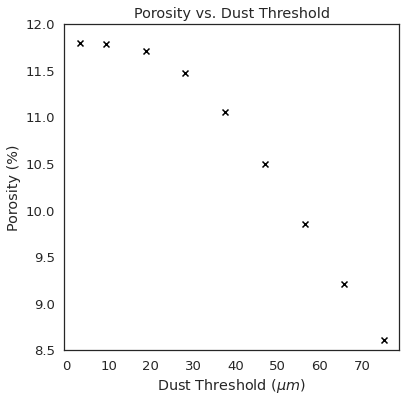

In [87]:
label=["$\mu m$"]

sns.set(font_scale=1.2)
sns.set_style(style = "white")
fig, ax = plt.subplots(1,1, figsize = (6,6))
ax.scatter(dust_thresh, porosity, marker="x", color = "black")
ax.set_title("Porosity vs. Dust Threshold")
ax.set_xlabel(f"Dust Threshold ({label[0]})")
ax.set_ylabel("Porosity (%)")
ax.set_ylim([8.5,12])
# plt.savefig(plots_dir + f'sensitivity_test_porosity_sample{sample_tag}_scan{str(scan_tag)}.png', format='png')
# plt.close()
plt.show()
